### Librerías

In [36]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import TensorBoard
from keras import backend as K
from matplotlib import pyplot as plt

### preparación de las imágenes

In [29]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'C:/Users/casa/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/data/train'
validation_data_dir = 'C:/Users/casa/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Definición de la arquitectura de la red

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Definición de data augmentation

In [31]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

### preparación de callbacks

In [32]:
## Logs para TensorBoard 
tbCallBack = TensorBoard(log_dir='C:/Users/casa/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/logs', histogram_freq=0, write_graph=True, write_images=True)

### preparación conjuntos train y test

In [33]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


### entrenamiento

In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[tbCallBack])

model.save_weights('first_try.h5')

Epoch 1/50
125/125 [==============================] - 73s 584ms/step - loss: 0.7242 - acc: 0.5485 - val_loss: 0.6694 - val_acc: 0.5575
Epoch 2/50
125/125 [==============================] - 74s 593ms/step - loss: 0.6766 - acc: 0.6110 - val_loss: 0.6301 - val_acc: 0.6212
Epoch 3/50
125/125 [==============================] - 72s 578ms/step - loss: 0.6286 - acc: 0.6535 - val_loss: 0.7730 - val_acc: 0.5487
Epoch 4/50
125/125 [==============================] - 72s 577ms/step - loss: 0.6157 - acc: 0.6805 - val_loss: 0.6019 - val_acc: 0.6550
Epoch 5/50
125/125 [==============================] - 72s 579ms/step - loss: 0.6017 - acc: 0.6885 - val_loss: 0.6035 - val_acc: 0.6975
Epoch 6/50
125/125 [==============================] - 75s 600ms/step - loss: 0.5769 - acc: 0.7155 - val_loss: 0.5385 - val_acc: 0.7288
Epoch 7/50
125/125 [==============================] - 73s 583ms/step - loss: 0.5710 - acc: 0.6965 - val_loss: 0.5331 - val_acc: 0.7288
Epoch 8/50
125/125 [==============================] - 7

### dibujar el resultado del entrenamiento

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


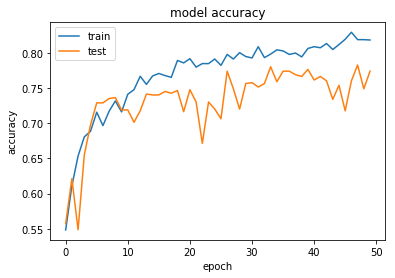

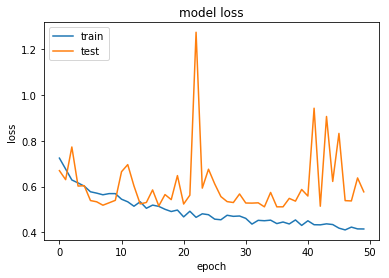

In [37]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()